In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pandas import DataFrame


# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [139]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
citydata = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

## Perform API Calls

In [140]:
# OpenWeatherMap API Key
api_key = "d498684b962c48d2760e2095b6530547"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


#queryUrl? 

In [151]:
#for loop
#print(url+"&q="+cities[0])
for x in cities: 
    response = requests.get(url+"&q="+x)
    data = response.json()
    #print(json.dumps(data,indent=4, sort_keys=True))
    
    #Create Variables
    latitude = data["coord"]["lat"]
    longitude = data["coord"]["lon"]
    temp = data["main"]["temp"]
    humidity = data["main"]["humidity"]
    cloud = data["clouds"]["all"]
    wind = data["wind"]["speed"]
    city = data["name"]

    #Create dictionary
    citydata.append({'latitude':latitude, 
                 'longitude':longitude, 
                 'temperature':temp,
                'humidity':humidity,
                'cloud':cloud,
                'wind':wind})
#print(citydata)
    #Create a dataframe
df = DataFrame(data = citydata, columns = [
                                            'latitude',
                                           'longitude',
                                           'temperature',
                                           'humidity',
                                           'cloud',
                                          'wind'])
df.head()

KeyError: 'coord'

<function matplotlib.pyplot.show(*args, **kw)>

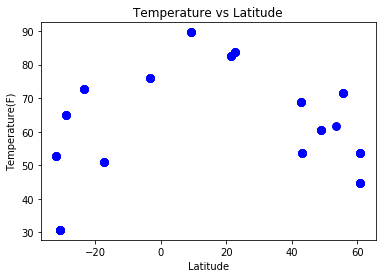

In [142]:
#Plot 1 : Temp v Latitude
plt.scatter(df.latitude, df.temperature, marker = 'o', facecolor = 'blue', s = temp)
plt.ylabel('Temperature(F)')
plt.xlabel('Latitude')
plt.title('Temperature vs Latitude')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

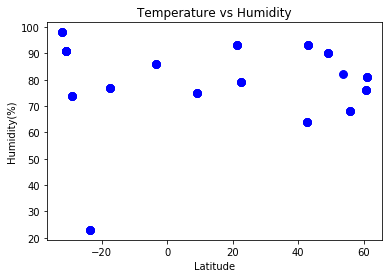

In [143]:
#Plot 2 : Humidity v Latitude
plt.scatter(df.latitude, df.humidity, marker = 'o', facecolor = 'blue', s = temp)
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.title('Temperature vs Humidity')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

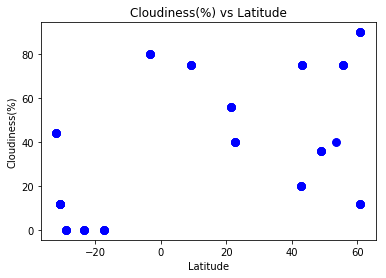

In [144]:
#Plot 3 : Cloudiness v Latitude
plt.scatter( df.latitude, df.cloud, marker = 'o', facecolor = 'blue', s = temp)
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.title('Cloudiness(%) vs Latitude')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

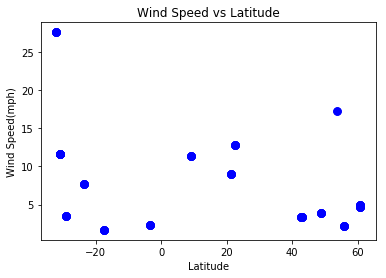

In [145]:
#Plot 4 : wind Speed v Latitude
plt.scatter( df.latitude,df.wind, marker = 'o', facecolor = 'blue', s = temp)
plt.ylabel('Wind Speed(mph)')
plt.xlabel('Latitude')
plt.title('Wind Speed vs Latitude')
plt.show